In [ ]:
import google.generativeai as genai
import PIL.Image

In [ ]:
# Used to securely store your API key
from google.colab import userdata

GEMINI_API_KEY=userdata.get('GEMINI_API_KEY')
genai.configure(api_key=GEMINI_API_KEY)
model = genai.GenerativeModel('gemini-2.5-flash')

In [ ]:
img = PIL.Image.open("/content/drive/MyDrive/fall.v1i.coco/test/000223_89_jpg.rf.c708a5b80023dde3621275144940041b.jpg")

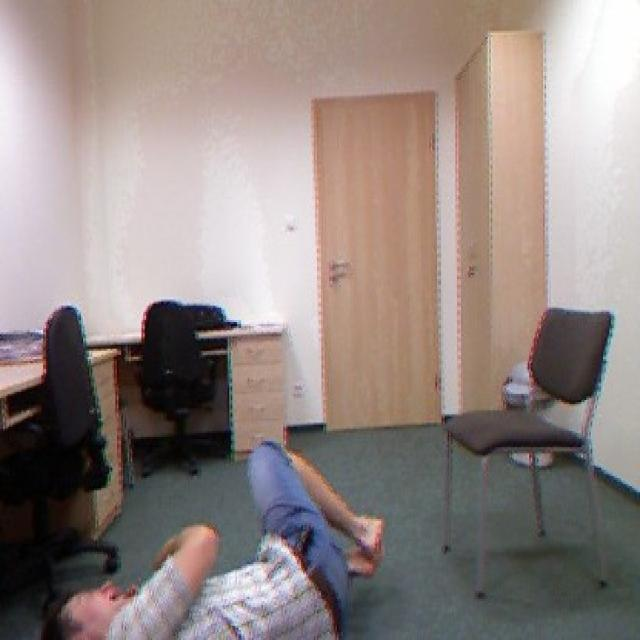

In [ ]:
from IPython.display import display

display(img)

In [ ]:
prompt = """
You are an AI vision system designed to assist emergency responders. Analyze the provided image and respond ONLY in valid JSON format with the following keys:

- "fall_detected": boolean,
- "context": string (must be a 2 line description of the condition of the person and the surroundings; estimate the cause of fall as well),
- "bleeding_observed": boolean,
- "person_condition": string (one of: "alert", "unresponsive", "injured", "bleeding", "unknown"),
- "confidence": float (how sure are you about your prediction in percentage)

Do not include any other text.
"""

In [ ]:
response = model.generate_content([prompt, img])

In [ ]:
import json
try:
    result = json.loads(response.text)
    print(result)
except json.JSONDecodeError:
    # Fallback: retry or log error
    print("Failed to parse JSON:", response.text)

Failed to parse JSON: ```json
{
  "fall_detected": true,
  "context": "A person is lying on their back on the carpeted floor of an office, with knees bent and arms near their head.\nThey appear unresponsive; the cause of the fall is estimated to be a medical event or accidental trip.",
  "bleeding_observed": false,
  "person_condition": "unresponsive",
  "confidence": 90.0
}
```
